# Chapter 10. RNN - 딥러닝을 이용한 문서 분류

## 10.3. RNN을 이용한 문서 분류 - NLTK 영화 리뷰 감성분석

### 10.3.1 워드 임베딩을 위한 데이터 준비


In [2]:
from nltk.corpus import movie_reviews
fileids = movie_reviews.fileids() #movie review data에서 file id를 가져옴
reviews = [movie_reviews.raw(fileid) for fileid in fileids] #file id를 이용해 raw text file을 가져옴
categories = [movie_reviews.categories(fileid)[0] for fileid in fileids] 
#file id를 이용해 label로 사용할 category 즉 positive와 negative 정보를 순서대로 가져옴

print('Reviews count:', len(reviews))
print('Length of the first review:', len(reviews[0]))
print('Labels:', set(categories))

Reviews count: 2000
Length of the first review: 4043
Labels: {'neg', 'pos'}


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
np.random.seed(7)
tf.random.set_seed(7)

max_words = 10000 #사용할 단어의 수

# 빈도가 높은 10000개의 단어를 선택하도록 객체 생성
tokenizer = Tokenizer(num_words=max_words, oov_token='UNK') 

tokenizer.fit_on_texts(reviews) #단어 인덱스 구축

#만들어진 단어 인덱스를 이용해 문서들을 변환
X = tokenizer.texts_to_sequences(reviews) 

print('Lengths of first 10 documents:', [len(doc) for doc in X[:10]])

Lengths of first 10 documents: [710, 240, 486, 479, 733, 671, 550, 584, 702, 776]


In [4]:
print(reviews[0])

plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , have no id

In [5]:
print(X[0])

[98, 77, 949, 4622, 131, 6, 3, 2016, 789, 3764, 4, 103, 1314, 37, 73, 56, 25, 1341, 24, 5, 2, 519, 1325, 17, 14, 678, 1571, 6, 84, 55, 8, 34, 90, 4, 33, 4477, 604, 2, 638, 242, 2, 27, 4, 8854, 190, 41, 2186, 3, 302, 6462, 27, 13, 2, 949, 1458, 9, 2402, 20, 3, 80, 691, 362, 17, 1768, 10, 8, 3, 80, 106, 3980, 46, 7, 49, 143, 15, 466, 25, 57, 3668, 24, 6, 1175, 195, 19, 1342, 8855, 96, 46, 527, 6, 831, 2, 7098, 903, 12, 170, 363, 4, 118, 342, 4204, 8856, 17, 53, 21, 62, 4, 106, 753, 5, 243, 36, 2695, 5, 96, 4, 113, 1879, 51, 249, 1, 15, 24, 6180, 37, 250, 6, 32, 625, 15, 272, 3765, 1224, 17, 2795, 10, 2284, 40, 49, 21, 2, 470, 12, 2, 27, 78, 65, 349, 354, 7, 9, 38, 322, 89, 7840, 10, 437, 88, 1315, 17, 103, 1, 56, 15, 1446, 146, 8, 46, 35, 11, 25, 162, 1123, 32, 60, 362, 604, 160, 20, 53, 21, 1077, 53, 21, 82, 505, 136, 29, 2, 329, 53, 21, 486, 28, 178, 39, 2, 329, 53, 21, 770, 1, 53, 21, 1, 53, 21, 3, 1, 5, 911, 115, 53, 21, 5278, 5, 1387, 172, 9, 633, 4, 64, 5, 10, 7, 322, 26, 1958, 144

In [6]:
print("Index of 'the':", tokenizer.word_index["the"])
print("Index of 'review':", tokenizer.word_index["two"])
print("Index of out-of-vocabulary words:", tokenizer.word_index["UNK"])

Index of 'the': 2
Index of 'review': 77
Index of out-of-vocabulary words: 1


In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 500 #문서의 단어 수를 제한

# 문서의 단어 수가 500보다 작으면 0을 채우고, 크면 잘라냄
# 잘라낼 때, 앞을 자를 지, 뒤를 자를 지 선택할 수 있음. 앞을 자르고 뒷부분을 쓰고자 하면 'pre' 선택. 뒷부분을 자르고 싶으면 'post' 선택
X = pad_sequences(X, maxlen=maxlen, truncating='pre')

In [8]:
import numpy as np

# label을 0, 1의 값으로 변환
label_dict = {'pos':1, 'neg':0}
y = np.array([label_dict[c] for c in categories])
print(set(y))

{0, 1}


In [9]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print('Train set count:', len(X_train))
print('Test set count:', len(X_test))
print('Test samples:', y_test[:20])

Train set count: 1600
Test set count: 400
Test samples: [0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1]


### 10.3.2 RNN이 아닌 일반적인 신경망 모형을 이용한 분류


In [10]:
# 케라스 모형 생성 및 학습
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding

model = Sequential([ #순차적 모형
    Embedding(max_words, 32, input_length=maxlen), #word embedding layer 생성
    # max_words는 one-hot encoding을 할 때의 vector 크기가 됨 - 사용된 단어의 수만큼
    # 각 단어는 32 크기의 dense vector로 embedding 됨
    # input_length는 한 document의 단어 수로 표현
    # 이 과정을 거치면 각 document는 (maxlen, 32)의 2차원 행렬이 됨 - 즉 word의 sequence가 됨

    Flatten(), # 2차원 행렬을 1차원으로 펼침
    Dense(1, activation='sigmoid') #binary logistic regression을 수행
])

model.summary() #모델의 요약정보 출력

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 flatten (Flatten)           (None, 16000)             0         
                                                                 
 dense (Dense)               (None, 1)                 16001     
                                                                 
Total params: 336,001
Trainable params: 336,001
Non-trainable params: 0
_________________________________________________________________


2022-11-01 20:45:47.394551: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-01 20:45:47.394874: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
# 모형의 optimizer와 loss function 등을 지정
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
# 학습을 수행
history = model.fit(X_train, y_train, 
                    epochs=10,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/10


2022-11-01 20:45:47.568177: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-01 20:45:47.779605: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 1s 19ms/step - loss: 0.6920 - acc: 0.5211 - val_loss: 0.6883 - val_acc: 0.5531
Epoch 2/10
 4/40 [==>...........................] - ETA: 0s - loss: 0.5943 - acc: 0.9375

2022-11-01 20:45:48.656345: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 1s 16ms/step - loss: 0.5886 - acc: 0.9297 - val_loss: 0.6804 - val_acc: 0.5906
Epoch 3/10
40/40 [==============================] - 1s 16ms/step - loss: 0.4527 - acc: 0.9758 - val_loss: 0.6637 - val_acc: 0.5938
Epoch 4/10
40/40 [==============================] - 1s 13ms/step - loss: 0.2958 - acc: 0.9945 - val_loss: 0.6405 - val_acc: 0.6219
Epoch 5/10
40/40 [==============================] - 1s 13ms/step - loss: 0.1655 - acc: 0.9984 - val_loss: 0.6174 - val_acc: 0.6438
Epoch 6/10
40/40 [==============================] - 1s 15ms/step - loss: 0.0811 - acc: 0.9992 - val_loss: 0.6096 - val_acc: 0.6531
Epoch 7/10
40/40 [==============================] - 1s 15ms/step - loss: 0.0361 - acc: 1.0000 - val_loss: 0.6032 - val_acc: 0.6625
Epoch 8/10
40/40 [==============================] - 1s 13ms/step - loss: 0.0145 - acc: 1.0000 - val_loss: 0.6121 - val_acc: 0.6594
Epoch 9/10
40/40 [==============================] - 1s 13ms/step - loss: 0.0054 - acc: 1.0000 

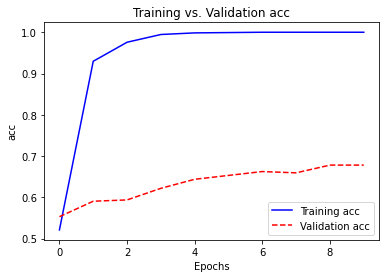

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_results(history, metric):
    plt.plot(history.history[metric], 'b', label='Training '+metric)
    plt.plot(history.history['val_'+metric], 'r--', label='Validation '+metric)
    plt.title('Training vs. Validation '+metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.show()

plot_results(history, 'acc')

In [13]:
#테스트 셋으로 학습된 모형의 성능을 평가
score = model.evaluate(X_test, y_test)
print(f'#Test accuracy:{score[1]:.3f}')

13/13 [==============================] - 0s 7ms/step - loss: 0.5641 - acc: 0.7200
#Test accuracy:0.720


2022-11-01 20:45:54.542410: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


### 10.3.3 문서의 순서정보를 활용하는 RNN 기반 문서분류


In [ ]:
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Embedding(max_words, 32),
    SimpleRNN(32), # 펼쳐서 flat하게 만드는 대신 RNN 모형을 사용, maxlen만큼의 시계열 데이터
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

adam = Adam(learning_rate=1e-4)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, 
                    epochs=10,
                    verbose=0,
                    validation_split=0.2)

plot_results(history, 'acc')
#테스트 셋으로 학습된 모형의 성능을 평가
score = model.evaluate(X_test, y_test)
print(f'#Test accuracy:{score[1]:.3f}')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 323,169
Trainable params: 323,169
Non-trainable params: 0
_________________________________________________________________


2022-11-01 20:22:27.767453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


## 10.4. LSTM, Bi-LSTM과 GRU를 이용한 성능 개선


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 64)          640000    
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 669,185
Trainable params: 669,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/8


2022-11-01 21:58:16.536028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-01 21:58:16.799429: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-01 21:58:18.347019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - ETA: 0s - loss: 0.6931 - acc: 0.5070

2022-11-01 21:58:25.981200: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-01 21:58:26.061592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 13s 183ms/step - loss: 0.6931 - acc: 0.5070 - val_loss: 0.6933 - val_acc: 0.4750
Epoch 2/8
40/40 [==============================] - 6s 144ms/step - loss: 0.6929 - acc: 0.5359 - val_loss: 0.6932 - val_acc: 0.5031
Epoch 3/8
40/40 [==============================] - 5s 135ms/step - loss: 0.6927 - acc: 0.5422 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 4/8
40/40 [==============================] - 5s 123ms/step - loss: 0.6926 - acc: 0.5617 - val_loss: 0.6932 - val_acc: 0.4875
Epoch 5/8
40/40 [==============================] - 5s 126ms/step - loss: 0.6924 - acc: 0.5617 - val_loss: 0.6932 - val_acc: 0.5031
Epoch 6/8
40/40 [==============================] - 7s 166ms/step - loss: 0.6923 - acc: 0.5672 - val_loss: 0.6932 - val_acc: 0.5094
Epoch 7/8
40/40 [==============================] - 6s 139ms/step - loss: 0.6921 - acc: 0.5773 - val_loss: 0.6932 - val_acc: 0.5250
Epoch 8/8
40/40 [==============================] - 5s 127ms/step - loss: 0.6920 - acc: 0.570

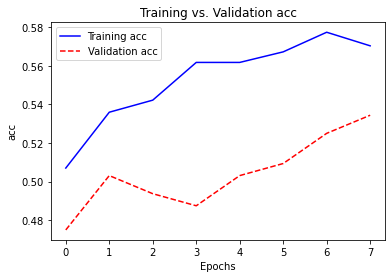

2022-11-01 21:59:06.742112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-01 21:59:06.826627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 4s 162ms/step - loss: 0.6928 - acc: 0.5225
#Test accuracy:0.522


In [18]:
from tensorflow.keras.layers import LSTM, Bidirectional, GRU
from tensorflow.keras.optimizers import Adam


model = Sequential([
    Embedding(max_words, 64),
    GRU(64), # simple RNN 대신 bidirectional LSTM을 사용
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

adam = Adam(learning_rate=1e-4)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train, 
                    epochs=8,
                    verbose=1,
                    validation_split=0.2)

plot_results(history, 'acc')

#테스트 셋으로 학습된 모형의 성능을 평가
score = model.evaluate(X_test, y_test)
print(f'#Test accuracy:{score[1]:.3f}')

In [ ]:
y_pred = np.round(model.predict(X_test[:10]))
for pred, y_t in zip(y_pred, y_test[:10]):
    print(f'predicted value: {pred[0]}, true value: {y_t}, so the prediction is {pred[0] == y_t}')